In [187]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


%matplotlib inline

Import the dataset:

In [188]:
app_store_df = pd.read_csv('C:/Users/zpiotrow/Desktop/AppStoreAssessmentDataScience.csv')

app_store_df.head(20)


,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_content_rating,app_genre,app_total_supported_langs
0,1,281656475,100788224,3.99,21292,4.0,4+,Games,10
1,2,281796108,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,281940292,100524032,0.00,188583,3.5,4+,Weather,3
3,4,282614216,128512000,0.00,262241,4.0,12+,Shopping,9
4,5,282935706,92774400,0.00,985920,4.5,4+,Reference,45
5,6,283619399,10485713,0.99,8253,4.0,4+,Games,1
6,7,283646709,227795968,0.00,119487,4.0,4+,Finance,19
7,8,284035177,130242560,0.00,1126879,4.0,12+,Music,1
8,9,284666222,49250304,9.99,1117,4.5,4+,Utilities,1
9,10,284736660,70023168,3.99,7885,4.0,4+,Games,10


<h1>How are apps commonly rated?</h1>
<body> Histogram of app ratings.
</body>

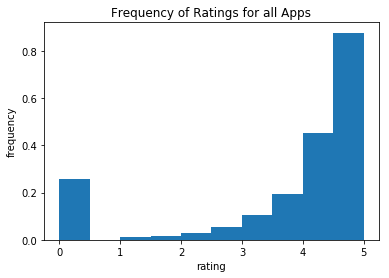

In [189]:
x = app_store_df['app_rating']
plt.hist(x, normed = True, bins = 10)
plt.ylabel('frequency')
plt.xlabel('rating')
plt.title('Frequency of Ratings for all Apps')

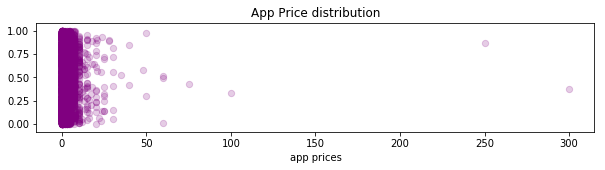

In [211]:
x = app_store_df.app_price
jittered_y = np.random.rand(len(x),1)
sizes = 40
plt.figure(figsize = (10,2))
plt.scatter(x, jittered_y, s = sizes, alpha = 0.2, color = 'purple', marker = 'o')
plt.xlabel('app prices')
plt.title('App Price distribution')
plt.savefig('price_dist.png')


In [191]:
app_store_df.app_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: app_genre, dtype: int64

In [192]:
genre_categorical = app_store_df.app_genre.astype('category')

In [193]:
genre_categorical.dtype

category

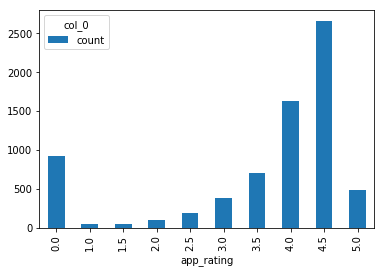

In [210]:
rating_tab = pd.crosstab(index = app_store_df['app_rating'], columns = 'count')
rating_tab.plot.bar()
plt.savefig('app_rating_counts.png')

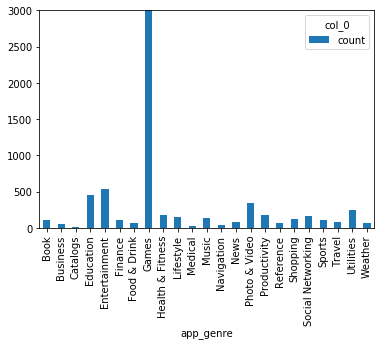

In [209]:
genre_tab = pd.crosstab(index = app_store_df['app_genre'], columns = 'count')
genre_tab.plot.bar(ylim = (0,3000))
# wow, all of the apps are games
plt.savefig('genre_count.png')

From the above plot, we can see that the vast majority of apps are games, with entertainment and education making poor second and third places.

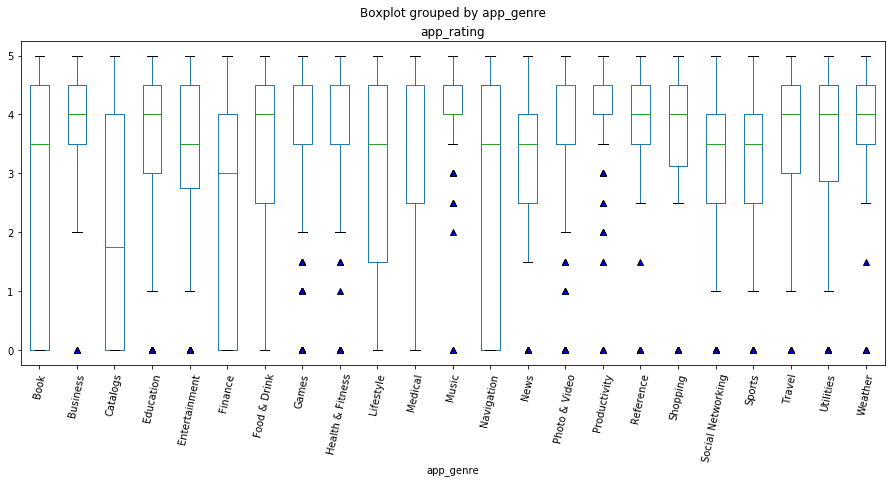

In [208]:
blue_tri = dict(markerfacecolor = 'b', marker = '^')
app_store_df.boxplot(column = 'app_rating', by = 'app_genre', figsize = (15,6), flierprops = blue_tri)
plt.xticks(rotation = 78)
plt.grid(False)
plt.savefig('app_genre_counts.png')

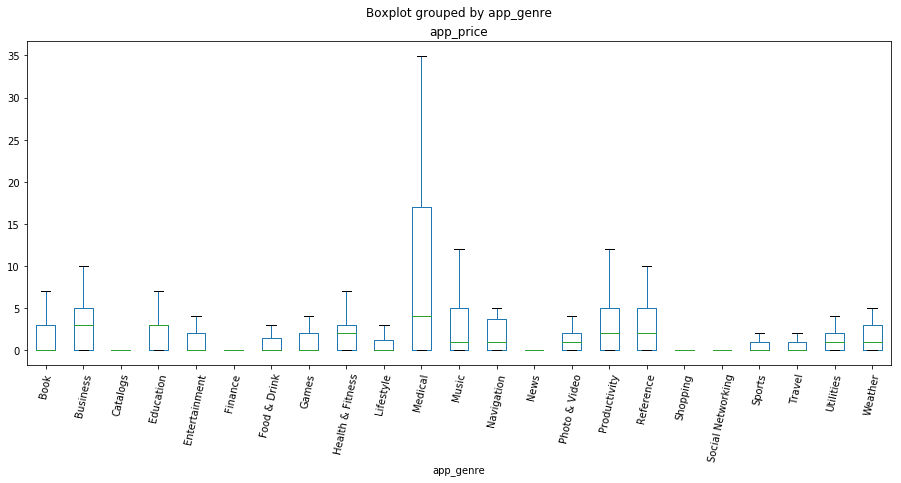

In [206]:
app_store_df.boxplot(column = 'app_price', by = 'app_genre', figsize = (15,6), showfliers = False )
plt.xticks(rotation = 78)
plt.grid(False)
plt.savefig('boxplt_app_genre_price.png')

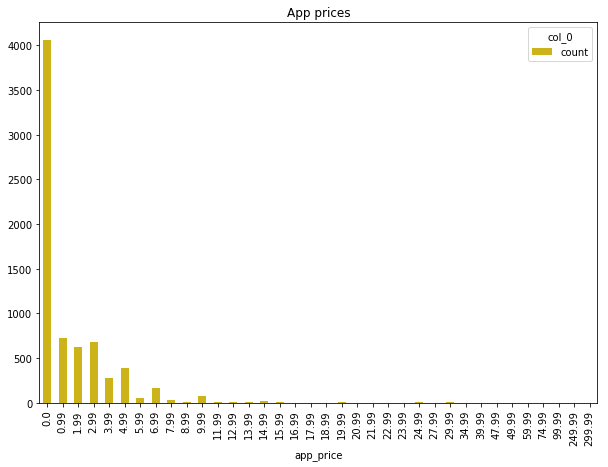

In [200]:
price_tab = pd.crosstab(index = app_store_df['app_price'], columns = 'count')
price_tab.plot.bar(figsize = (10,7), color = (.8,.7,.1), title = 'App prices')
plt.savefig('app_prices_count.png')

In [199]:
app_store_df.app_rating.value_counts()


4.5    2663
4.0    1626
0.0     929
3.5     702
5.0     492
3.0     383
2.5     196
2.0     106
1.5      56
1.0      44
Name: app_rating, dtype: int64

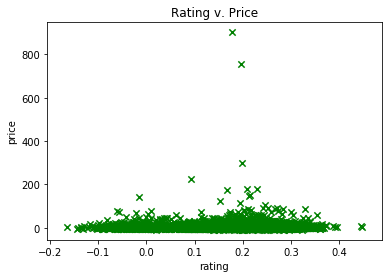

In [207]:
def jittered(n):
    stdev = .01*(max(n)-min(n))
    return(n +np.random.randn(len(n)))* stdev

x = app_store_df['app_rating']
y = app_store_df['app_price']
jittered_x = np.random.rand(len(x),1)
def jitter(x, y, s=20, c='b', marker='o', cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, hold=None, **kwargs):
    return plt.scatter(jittered(x),jittered(y),s=s, c=c, marker=marker, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, alpha=alpha, linewidths=linewidths, verts=verts, hold=hold, **kwargs)
jitter(x,y,s = 40, c = 'g', marker = 'x', cmap = 'viridis')
plt.xlabel('rating')
plt.ylabel('price')
plt.title('Rating v. Price')
plt.savefig('scatter_rating_price.png')